# CNN: Convolutional Neural Network on handwriting digits recognition

### import libraries

In [1]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.datasets import mnist
from random import randint
import matplotlib.pyplot as plt

Using TensorFlow backend.


### load mnist dataset

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

### compute the number of labels

In [4]:
num_labels = len(np.unique(y_train))

### sample and plot 25 mnist digits from train dataset

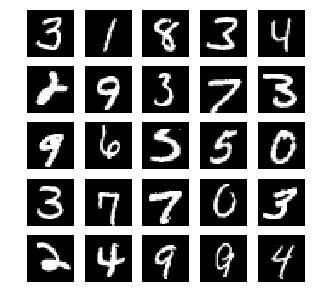

In [5]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

### reshape, resize and normalize

In [6]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size,1])
x_test = np.reshape(x_test,[-1,image_size,image_size,1])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### network parameters

In [7]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.3

### functional API to build CNN layers

In [8]:
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)

### image to vector before connecting to dense layer

In [9]:
y = Flatten()(y)

### dropout regularization

In [10]:
y = Dropout(dropout)(y)
outputs = Dense(num_labels,activation='softmax')(y)

### build the model by supplying inputs / outputs

In [11]:
model = Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0   

### compile and train the model

In [15]:
model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 580us/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0228 - val_accuracy: 0.9934
Epoch 2/20
60000/60000 [==============================] - 36s 604us/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0198 - val_accuracy: 0.9943
Epoch 3/20
60000/60000 [==============================] - 37s 617us/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0206 - val_accuracy: 0.9941
Epoch 4/20
60000/60000 [==============================] - 40s 660us/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0225 - val_accuracy: 0.9933
Epoch 5/20
60000/60000 [==============================] - 39s 654us/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0212 - val_accuracy: 0.9937
Epoch 6/20
60000/60000 [==============================] - 39s 644us/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0201 - val_accuracy: 0.9945
Epoch 7/20
60000/60000 [==============================] 

In [16]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\n\nCNN_TEST ACCURACY: %.2f%%" % (100.0*score[1]))

10000/10000 [==============================] - 1s 140us/step


CNN_TEST ACCURACY: 99.42%


### plotting

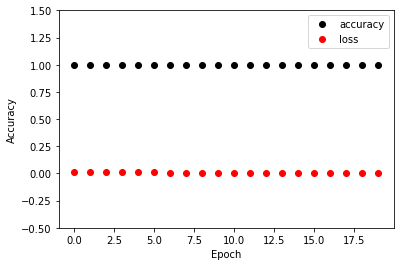

In [19]:
plt.plot(history.history['accuracy'],'ko',label='accuracy')
plt.plot(history.history['loss'],'ro',label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5,1.5])
plt.legend(loc='upper right')
plt.show()

### test the neural network

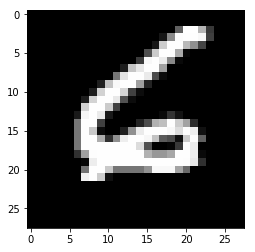

PREDICTION:  6


In [28]:
image_index = randint(0,10000)
plt.imshow(x_test[image_index].reshape(image_size,image_size),cmap='gray')
plt.show()
pred = model.predict(x_test[image_index].reshape(-1,image_size,image_size,1))
print("PREDICTION: ", pred.argmax())